# Named Entity Recognition (NER) on Sample Text

## 1. Import Libraries and Load the Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import spacy
from spacy import displacy

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
# Define Simple data:
texts = [
    # Tech News
    "TechCorp, a leading tech company based in New York, announced on Monday that CEO Jane Doe plans to introduce a new AI-powered smartphone. The device, named 'Nexus X,' will debut in Paris next month. Meanwhile, critics like Dr. Mark Smith argue that the launch could impact environmental policies. The company also partnered with HealthOrg, a nonprofit, to promote digital wellness. Apple declined to comment on the news. The event will coincide with the Global Tech Summit 2024.",
    # Sports News
    "Lionel Messi, the Argentine footballer, signed a $20 million contract with Miami FC on July 15, 2023. The deal was announced during a press conference at Hard Rock Stadium in Florida. Fans from across South America flooded social media to celebrate the move.",
    # Politics
    "President John Harper met with German Chancellor Angela Weber in Berlin last Friday to discuss NATO policies. The United Nations will host a climate summit in Geneva, Switzerland, in December 2025. Critics warn that the new tax law (HB 1420) might face delays in Congress.",
    # Science/Literature
    "Marie Curie, born in Warsaw in 1867, discovered radium and won the Nobel Prize in Chemistry in 1911. In 'The Great Gatsby,' Jay Gatsby hosts lavish parties in West Egg, New York, reflecting the excesses of the Jazz Age. A recent study in Nature Journal links sleep deprivation to decreased cognitive performance."
]

## 2. Process each text and extract entities:

NER doesn't need a preprocessing so we will extract it directly.

In [4]:
all_entities = []
for text in texts:
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    all_entities.extend(entities)

    displacy.render(doc, style="ent")

In [5]:
NER_df = pd.DataFrame(all_entities, columns=["Entity", "Label"])
NER_df.head()

,Entity,Label
0,TechCorp,ORG
1,New York,GPE
2,Monday,DATE
3,Jane Doe,PERSON
4,AI,GPE


In [6]:
NER_df.to_csv('NER.csv')

## 3. POS-Tagging Extraction:

### 3.1 POS-Tagging Implementation:

In [7]:
all_tokens = []
for text in texts:
    doc = nlp(text)
    tokens = [(token.text, token.pos_) for token in doc]
    all_tokens.extend(tokens)
    
    # Example sentence with POS tags
    print(f"\nText: {text[:100]}...")
    print("Sample POS tags:")
    for token in doc[:10]:  # First 10 tokens
        print(f"{token.text} ({token.pos_})")


Text: TechCorp, a leading tech company based in New York, announced on Monday that CEO Jane Doe plans to i...
Sample POS tags:
TechCorp (PROPN)
, (PUNCT)
a (DET)
leading (VERB)
tech (NOUN)
company (NOUN)
based (VERB)
in (ADP)
New (PROPN)
York (PROPN)

Text: Lionel Messi, the Argentine footballer, signed a $20 million contract with Miami FC on July 15, 2023...
Sample POS tags:
Lionel (PROPN)
Messi (PROPN)
, (PUNCT)
the (DET)
Argentine (ADJ)
footballer (NOUN)
, (PUNCT)
signed (VERB)
a (DET)
$ (SYM)

Text: President John Harper met with German Chancellor Angela Weber in Berlin last Friday to discuss NATO ...
Sample POS tags:
President (PROPN)
John (PROPN)
Harper (PROPN)
met (VERB)
with (ADP)
German (ADJ)
Chancellor (PROPN)
Angela (PROPN)
Weber (PROPN)
in (ADP)

Text: Marie Curie, born in Warsaw in 1867, discovered radium and won the Nobel Prize in Chemistry in 1911....
Sample POS tags:
Marie (PROPN)
Curie (PROPN)
, (PUNCT)
born (VERB)
in (ADP)
Warsaw (PROPN)
in (ADP)
1867 (NUM)
, (PUNCT)

In [8]:
POS_df = pd.DataFrame(all_tokens, columns=["Token", "POS"])
POS_df.head()

,Token,POS
0,TechCorp,PROPN
1,",",PUNCT
2,a,DET
3,leading,VERB
4,tech,NOUN


In [9]:
POS_df.to_csv('POS.csv')

### 3.2 Analysis:

#### 3.2.1 POS Tag Distribution:

In [10]:
pos_counts = Counter([pos for _, pos in all_tokens])

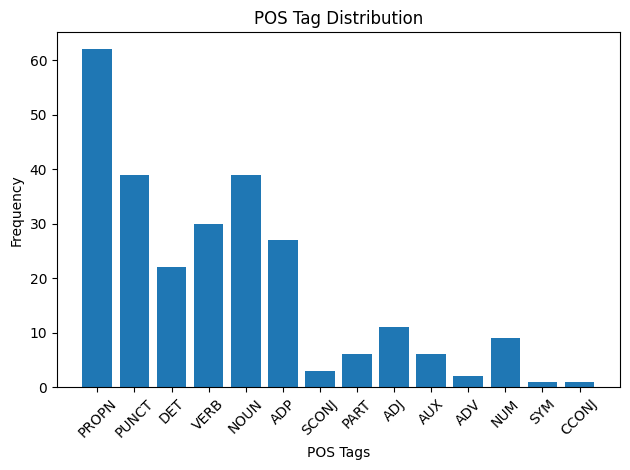

In [11]:
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("POS Tag Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pos_distribution.png")
plt.show()

#### 3.2 Common patterns (noun-verb pairs):

In [23]:
for text in texts:
    doc = nlp(text)
    noun_verb_pairs = [(token.text, next_token.text) for token, next_token in zip(doc, doc[1:]) if token.pos_ == "NOUN" and next_token.pos_ == "VERB"]
    print("\nExample Noun-Verb Pairs:", noun_verb_pairs)


Example Noun-Verb Pairs: [('company', 'based')]

Example Noun-Verb Pairs: []

Example Noun-Verb Pairs: [('Critics', 'warn')]

Example Noun-Verb Pairs: [('hosts', 'lavish')]
